# 07 Modelling-Multiple linear Regression


---

# Contents

- [1.0 About Prophet Model](#1.0-About-Prophet-Model)
- [2.0 Load Data](#2.0-Load-Data)
    - [2.1 EUR/USD Data](#2.1-EUR/USD-Data)
    - [2.2 Pattern Data](#2.2-Pattern-Data)
- [3.0 Model](#3.0-Model)
    - [3.1 Train/Test Split](#3.1-Train/Test-Split)
    - [3.2 Fit Model](#3.2-Fit-Model)
    - [3.3 Calculate Results](#3.3-Calculate-Results)
    - [3.4 Run Model](#3.4-Run-Model)
- [4.0 Results](#4.0-Results)
- [5.0 Observations](#5.0-Observations)



In [200]:
import pandas as pd
import numpy as np
import seaborn as sns
plt.style.use('fivethirtyeight') 
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import calendar

from sklearn.metrics import r2_score, mean_squared_error
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

#Import basic packages
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from statsmodels.tools.eval_measures import rmse


In [3]:
pd.set_option('display.max_columns', None)

---

# 1.0  Model

About Prophet

More About Prophet

---

# 2.0 Load Data

## 2.1 EUR/USD Data

In [148]:
# read in the daily data
daily = pd.read_csv('/Users/stuartdaw/Documents/Capstone_data/data/resampled/eur-usd2daily.csv', 
                    index_col='date', parse_dates=True)

In [149]:
daily.head()

,open,high,low,close,mid,wk_mv_avg,mnth_mv_avg,volatility_3_day,volatility_10_day,pct_chge_3_prds,pct_chge_5_prds,pct_chge_10_prds,height,height-1,height-2,height-3,direction,gold_usd,gold_euro,marubozu,marubozu+1,marubozu-1,marubozu-2,day-1_open,day-2_open,day-3_open,day-1_high,day-2_high,day-3_high,day-1_low,day-2_low,day-3_low,day-1_close,day-2_close,day-3_close,day+1_open,day+1_high,day+1_low,day+1_close,day+2_high,day+2_low,day+3_high,day+3_low,day+4_high,day+4_low,day+5_high,day+5_low,exit_price,select,target,date+5
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-07-14,0.9353,0.9389,0.9318,0.9383,0.93680,0.94522,0.948145,0.003250,0.003387,-0.016431,-0.014102,-0.017514,0.0030,0.0062,0.0086,0.0041,1.0,97.4,122.0,0,0.0,-1.0,-1.0,0.9416,0.9503,0.9545,0.9425,0.9517,0.9569,0.9330,0.9396,0.9496,0.9354,0.9417,0.9504,0.9382,0.9402,0.9342,0.9360,0.9368,0.9227,0.9270,0.9193,0.9342,0.9204,0.9384,0.9319,0.9413,0,0.9402,2000-07-21
2000-07-17,0.9382,0.9402,0.9342,0.9360,0.93710,0.94217,0.947100,0.004282,0.003440,-0.009408,-0.016013,-0.014875,0.0022,0.0030,0.0062,0.0086,-1.0,98.1,123.3,0,-1.0,0.0,-1.0,0.9353,0.9416,0.9503,0.9389,0.9425,0.9517,0.9318,0.9330,0.9396,0.9383,0.9354,0.9417,0.9361,0.9368,0.9227,0.9256,0.9270,0.9193,0.9342,0.9204,0.9384,0.9319,0.9367,0.9313,0.9338,0,0.9193,2000-07-24
2000-07-18,0.9361,0.9368,0.9227,0.9256,0.93085,0.93785,0.945633,0.003582,0.003797,-0.008151,-0.022678,-0.020519,0.0105,0.0022,0.0030,0.0062,-1.0,98.3,123.8,-1,0.0,0.0,0.0,0.9382,0.9353,0.9416,0.9402,0.9389,0.9425,0.9342,0.9318,0.9330,0.9360,0.9383,0.9354,0.9255,0.9270,0.9193,0.9246,0.9342,0.9204,0.9384,0.9319,0.9367,0.9313,0.9433,0.9329,0.9151,0,0.9193,2000-07-25
2000-07-19,0.9255,0.9270,0.9193,0.9246,0.92505,0.93366,0.944207,0.003915,0.003618,-0.012543,-0.022146,-0.029125,0.0009,0.0105,0.0022,0.0030,-1.0,97.0,123.3,0,1.0,-1.0,0.0,0.9361,0.9382,0.9353,0.9368,0.9402,0.9389,0.9227,0.9342,0.9318,0.9256,0.9360,0.9383,0.9245,0.9342,0.9204,0.9325,0.9384,0.9319,0.9367,0.9313,0.9433,0.9329,0.9450,0.9391,0.9237,0,0.9204,2000-07-26
2000-07-20,0.9245,0.9342,0.9204,0.9325,0.92850,0.93166,0.943221,0.005881,0.004167,-0.009177,-0.010655,-0.024531,0.0080,0.0009,0.0105,0.0022,1.0,97.1,123.3,1,0.0,0.0,-1.0,0.9255,0.9361,0.9382,0.9270,0.9368,0.9402,0.9193,0.9227,0.9342,0.9246,0.9256,0.9360,0.9324,0.9384,0.9319,0.9365,0.9367,0.9313,0.9433,0.9329,0.9450,0.9391,0.9444,0.9314,0.9405,0,0.9450,2000-07-27


In [150]:
# for count in range(4,16):
#     daily['day-' + str(count) +'_mid'] = daily['mid'].shift(count)
#     daily['day-' + str(count) +'_height'] = daily['height'].shift(count)

In [151]:
daily.head(20)

,open,high,low,close,mid,wk_mv_avg,mnth_mv_avg,volatility_3_day,volatility_10_day,pct_chge_3_prds,pct_chge_5_prds,pct_chge_10_prds,height,height-1,height-2,height-3,direction,gold_usd,gold_euro,marubozu,marubozu+1,marubozu-1,marubozu-2,day-1_open,day-2_open,day-3_open,day-1_high,day-2_high,day-3_high,day-1_low,day-2_low,day-3_low,day-1_close,day-2_close,day-3_close,day+1_open,day+1_high,day+1_low,day+1_close,day+2_high,day+2_low,day+3_high,day+3_low,day+4_high,day+4_low,day+5_high,day+5_low,exit_price,select,target,date+5
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-07-14,0.9353,0.9389,0.9318,0.9383,0.93680,0.94522,0.948145,0.003250,0.003387,-0.016431,-0.014102,-0.017514,0.0030,0.0062,0.0086,0.0041,1.0,97.4,122.0,0,0.0,-1.0,-1.0,0.9416,0.9503,0.9545,0.9425,0.9517,0.9569,0.9330,0.9396,0.9496,0.9354,0.9417,0.9504,0.9382,0.9402,0.9342,0.9360,0.9368,0.9227,0.9270,0.9193,0.9342,0.9204,0.9384,0.9319,0.9413,0,0.9402,2000-07-21
2000-07-17,0.9382,0.9402,0.9342,0.9360,0.93710,0.94217,0.947100,0.004282,0.003440,-0.009408,-0.016013,-0.014875,0.0022,0.0030,0.0062,0.0086,-1.0,98.1,123.3,0,-1.0,0.0,-1.0,0.9353,0.9416,0.9503,0.9389,0.9425,0.9517,0.9318,0.9330,0.9396,0.9383,0.9354,0.9417,0.9361,0.9368,0.9227,0.9256,0.9270,0.9193,0.9342,0.9204,0.9384,0.9319,0.9367,0.9313,0.9338,0,0.9193,2000-07-24
2000-07-18,0.9361,0.9368,0.9227,0.9256,0.93085,0.93785,0.945633,0.003582,0.003797,-0.008151,-0.022678,-0.020519,0.0105,0.0022,0.0030,0.0062,-1.0,98.3,123.8,-1,0.0,0.0,0.0,0.9382,0.9353,0.9416,0.9402,0.9389,0.9425,0.9342,0.9318,0.9330,0.9360,0.9383,0.9354,0.9255,0.9270,0.9193,0.9246,0.9342,0.9204,0.9384,0.9319,0.9367,0.9313,0.9433,0.9329,0.9151,0,0.9193,2000-07-25
2000-07-19,0.9255,0.9270,0.9193,0.9246,0.92505,0.93366,0.944207,0.003915,0.003618,-0.012543,-0.022146,-0.029125,0.0009,0.0105,0.0022,0.0030,-1.0,97.0,123.3,0,1.0,-1.0,0.0,0.9361,0.9382,0.9353,0.9368,0.9402,0.9389,0.9227,0.9342,0.9318,0.9256,0.9360,0.9383,0.9245,0.9342,0.9204,0.9325,0.9384,0.9319,0.9367,0.9313,0.9433,0.9329,0.9450,0.9391,0.9237,0,0.9204,2000-07-26
2000-07-20,0.9245,0.9342,0.9204,0.9325,0.92850,0.93166,0.943221,0.005881,0.004167,-0.009177,-0.010655,-0.024531,0.0080,0.0009,0.0105,0.0022,1.0,97.1,123.3,1,0.0,0.0,-1.0,0.9255,0.9361,0.9382,0.9270,0.9368,0.9402,0.9193,0.9227,0.9342,0.9246,0.9256,0.9360,0.9324,0.9384,0.9319,0.9365,0.9367,0.9313,0.9433,0.9329,0.9450,0.9391,0.9444,0.9314,0.9405,0,0.9450,2000-07-27
2000-07-21,0.9324,0.9384,0.9319,0.9365,0.93445,0.93119,0.942879,0.006660,0.005033,0.003867,-0.002509,-0.016575,0.0041,0.0080,0.0009,0.0105,1.0,97.1,122.2,0,0.0,1.0,0.0,0.9245,0.9255,0.9361,0.9342,0.9270,0.9368,0.9204,0.9193,0.9227,0.9325,0.9246,0.9256,0.9366,0.9367,0.9313,0.9330,0.9433,0.9329,0.9450,0.9391,0.9444,0.9314,0.9338,0.9229,0.9406,0,0.9450,2000-07-28
2000-07-24,0.9366,0.9367,0.9313,0.9330,0.93480,0.93073,0.942807,0.003023,0.004904,0.010540,-0.002454,-0.018428,0.0036,0.0041,0.0080,0.0009,-1.0,97.2,122.3,0,1.0,0.0,1.0,0.9324,0.9245,0.9255,0.9384,0.9342,0.9270,0.9319,0.9204,0.9193,0.9365,0.9325,0.9246,0.9329,0.9433,0.9329,0.9412,0.9450,0.9391,0.9444,0.9314,0.9338,0.9229,0.9295,0.9224,0.9294,0,0.9224,2000-07-31
2000-07-25,0.9329,0.9433,0.9329,0.9412,0.93705,0.93197,0.942790,0.003070,0.005057,0.009208,0.006661,-0.016169,0.0083,0.0036,0.0041,0.0080,1.0,97.2,121.2,1,0.0,0.0,0.0,0.9366,0.9324,0.9245,0.9367,0.9384,0.9342,0.9313,0.9319,0.9204,0.9330,0.9365,0.9325,0.9411,0.9450,0.9391,0.9435,0.9444,0.9314,0.9338,0.9229,0.9295,0.9224,0.9293,0.9135,0.9495,0,0.9450,2000-08-01
2000-07-26,0.9411,0.9450,0.9391,0.9435,0.94230,0.93542,0.942795,0.002636,0.005168,0.008401,0.018648,-0.003911,0.0024,0.0083,0.0036,0.0041,1.0,97.1,121.0,0,-1.0,1.0,0.0,0.9329,0.9366,0.9324,0.9433,0.9367,0.9384,0.9329,0.9313,0.9319,0.9412,0.9330,0.9365,0.9434,0.9444,0.9314,0.9319,0.9338,0.9229,0.9295,0.9224,0.9293,0.9135,0.9192,0.9117,0.9459,0,0.9444,2000-08-02


In [152]:
daily.shape

(4612, 51)

In [153]:
daily.dropna(inplace=True)

In [154]:
daily.shape

(4612, 51)

In [155]:
strat_res = pd.read_csv('/Users/stuartdaw/Documents/Capstone_data/model_results/arima_results.csv', parse_dates=True)

In [156]:
strat_res.tail(20)

,name,strategy,date,time_frame,RMSE,MSE,classification
42,arima-0-1-0,marubozu,2012-07-25,daily,0.013808,0.000191,tp
43,arima-0-1-0,marubozu,2012-12-05,daily,0.015200,0.000231,fn
44,arima-0-1-0,marubozu,2013-05-23,daily,0.003633,0.000013,tp
45,arima-0-1-0,marubozu,2013-08-02,daily,0.003621,0.000013,tp
46,arima-0-1-0,marubozu,2014-09-19,daily,0.012922,0.000167,fn
47,arima-0-1-0,marubozu,2014-12-11,daily,0.008296,0.000069,fn
48,arima-0-1-0,marubozu,2015-02-05,daily,0.015147,0.000229,tn
49,arima-0-1-0,marubozu,2015-06-29,daily,0.017357,0.000301,tn
50,arima-0-1-0,marubozu,2016-01-06,daily,0.008007,0.000064,fn
51,arima-0-1-0,marubozu,2016-01-20,daily,0.009116,0.000083,fn


In [157]:
len(strat_res)

62

In [158]:
# Create features dataset

In [161]:
#     # insert the signal to dataset
#     train_test.insert(0, 'signal', model_info['signal'])

#     # create start and end points for the test/train splits
#     model_info['start'] = len(train_test)-5
#     model_info['end'] = len(train_test)-1

In [162]:
daily_pattern = pd.read_csv('/Users/stuartdaw/Documents/Capstone_data/data/targets/daily_pattern2.csv', 
                           parse_dates=True)
daily_pattern.head()

,pattern_end
0,2000-10-11
1,2000-10-20
2,2001-04-05
3,2001-04-09
4,2001-08-20


In [163]:
features = daily[daily.index.isin(daily_pattern['pattern_end'])]
features.shape
#df[df.index.isin(my_list)]

(64, 51)

In [164]:
features = features[features.index.isin(strat_res['date'])]
features.shape

(62, 51)

In [165]:
results_series = list(strat_res['classification'])
features['ml_signal'] = results_series
features


,open,high,low,close,mid,wk_mv_avg,mnth_mv_avg,volatility_3_day,volatility_10_day,pct_chge_3_prds,pct_chge_5_prds,pct_chge_10_prds,height,height-1,height-2,height-3,direction,gold_usd,gold_euro,marubozu,marubozu+1,marubozu-1,marubozu-2,day-1_open,day-2_open,day-3_open,day-1_high,day-2_high,day-3_high,day-1_low,day-2_low,day-3_low,day-1_close,day-2_close,day-3_close,day+1_open,day+1_high,day+1_low,day+1_close,day+2_high,day+2_low,day+3_high,day+3_low,day+4_high,day+4_low,day+5_high,day+5_low,exit_price,select,target,date+5,ml_signal
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-10-11,0.87330,0.87640,0.86440,0.86770,0.870500,0.870460,0.869214,0.001513,0.001716,0.000632,-0.006392,-0.014491,0.00560,0.00530,0.00190,0.00030,-1.0,94.8,127.4,-1,0.0,1.0,0.0,0.86790,0.86990,0.87010,0.87470,0.87100,0.87430,0.86700,0.86650,0.86740,0.87320,0.86800,0.86980,0.86760,0.86820,0.85970,0.86280,0.86600,0.85300,0.85570,0.84620,0.85650,0.84800,0.85790,0.83270,0.86210,1,0.83270,2000-10-18,tp
2000-10-20,0.84710,0.84750,0.83510,0.84010,0.843600,0.847740,0.867864,0.002844,0.003502,-0.009801,-0.017985,-0.030289,0.00700,0.00710,0.01460,0.00530,-1.0,94.0,131.8,-1,0.0,1.0,-1.0,0.84010,0.85460,0.84930,0.84870,0.85790,0.85650,0.83830,0.83270,0.84800,0.84720,0.84000,0.85460,0.84020,0.84260,0.83450,0.83670,0.84000,0.83490,0.83890,0.82490,0.83250,0.82290,0.84460,0.82900,0.83310,1,0.82290,2000-10-27,tp
2001-04-05,0.90660,0.90910,0.89430,0.89670,0.901650,0.890360,0.901571,0.007044,0.006930,0.024369,0.020832,0.010988,0.00990,0.01000,0.01380,0.00540,-1.0,89.7,117.5,-1,1.0,1.0,1.0,0.89660,0.88290,0.87750,0.90800,0.89870,0.88370,0.89370,0.88210,0.87450,0.90660,0.89670,0.88290,0.89660,0.90510,0.89270,0.90340,0.90510,0.89470,0.89950,0.88680,0.89180,0.88140,0.89460,0.88400,0.88680,1,0.88140,2001-04-12,tp
2001-04-09,0.90350,0.90510,0.89470,0.89650,0.900000,0.898610,0.898467,0.001073,0.006785,-0.001775,0.022495,0.006937,0.00700,0.00680,0.00990,0.01000,-1.0,90.0,117.2,-1,-1.0,1.0,-1.0,0.89660,0.90660,0.89660,0.90510,0.90910,0.90800,0.89270,0.89430,0.89370,0.90340,0.89670,0.90660,0.89640,0.89950,0.88680,0.88980,0.89180,0.88140,0.89460,0.88400,0.89330,0.88910,0.88950,0.88340,0.88950,1,0.88140,2001-04-16,tp
2001-08-20,0.91780,0.92050,0.91130,0.91260,0.915200,0.911100,0.887862,0.002255,0.003879,0.005714,0.021771,0.039350,0.00520,0.00530,0.00310,0.01100,-1.0,96.1,123.7,-1,0.0,1.0,0.0,0.91240,0.91560,0.90450,0.91840,0.92030,0.91710,0.91050,0.90930,0.90340,0.91770,0.91250,0.91550,0.91250,0.91850,0.90820,0.91680,0.92420,0.91230,0.91700,0.91010,0.91690,0.90780,0.91250,0.90870,0.90740,1,0.90780,2001-08-27,tp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-14,1.16928,1.17215,1.16199,1.16357,1.166425,1.162073,1.160078,0.002361,0.002441,0.006246,0.006945,0.002854,0.00571,0.00557,0.00515,0.00123,-1.0,417.6,420.4,-1,1.0,1.0,1.0,1.16372,1.15858,1.15980,1.17008,1.16493,1.16437,1.16090,1.15698,1.15654,1.16929,1.16373,1.15857,1.16361,1.17027,1.16177,1.16953,1.17243,1.16520,1.17147,1.16500,1.17855,1.16772,1.18025,1.17325,1.15786,1,1.16177,2018-09-21,tn
2018-10-22,1.15144,1.15499,1.14530,1.14543,1.148435,1.150957,1.157464,0.002761,0.002606,-0.003989,-0.006686,-0.001478,0.00601,0.00569,0.00421,0.00611,-1.0,424.7,434.8,-1,0.0,1.0,0.0,1.14576,1.14997,1.15609,1.15343,1.15273,1.15777,1.14330,1.14494,1.14941,1.15145,1.14576,1.14998,1.14543,1.14932,1.14391,1.14708,1.14762,1.13789,1.14322,1.13560,1.14206,1.13355,1.14163,1.13605,1.13942,1,1.13355,2018-10-29,fn
2018-12-10,1.14282,1.14398,1.13500,1.13690,1.139860,1.137008,1.135899,0.001891,0.002309,0.005385,0.003054,0.005052,0.00592,0.00544,0.00265,0.00191,-1.0,432.7,446.7,-1,0.0,1.0,0.0,1.13737,1.13472,1.13280,1.14425,1.14121,1.13609,1.13602,1.13207,1.13105,1.14281,1.13737,1.13471,1.13690,1.13999,1.13062,1.13261,1.13871,1.13149,1.13932,1.13310,1.13616,1.12696,1.13600,1.

In [166]:
features.groupby('direction').count()['open']

direction
-1.0    36
 1.0    26
Name: open, dtype: int64

In [167]:
features.groupby('ml_signal').count()

,open,high,low,close,mid,wk_mv_avg,mnth_mv_avg,volatility_3_day,volatility_10_day,pct_chge_3_prds,pct_chge_5_prds,pct_chge_10_prds,height,height-1,height-2,height-3,direction,gold_usd,gold_euro,marubozu,marubozu+1,marubozu-1,marubozu-2,day-1_open,day-2_open,day-3_open,day-1_high,day-2_high,day-3_high,day-1_low,day-2_low,day-3_low,day-1_close,day-2_close,day-3_close,day+1_open,day+1_high,day+1_low,day+1_close,day+2_high,day+2_low,day+3_high,day+3_low,day+4_high,day+4_low,day+5_high,day+5_low,exit_price,select,target,date+5
ml_signal,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
fn,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27
fp,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
tn,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18
tp,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13


In [168]:
def convert_signal(row):
    if row['ml_signal'] == 'tp':
        return row['direction']
    else:
        return 0

In [169]:
features['ml_signal'] = features.apply(convert_signal, axis=1)

In [170]:
features.groupby('ml_signal').count()['open']

ml_signal
-1.0     7
 0.0    49
 1.0     6
Name: open, dtype: int64

---

In [192]:
corr_df = features.drop(['marubozu+1','day+1_open', 'day+1_high', 'day+1_low', 'day+1_close', 'day+2_high',
       'day+2_low', 'day+3_high', 'day+3_low', 'day+4_high', 'day+4_low',
       'day+5_high', 'day+5_low', 'exit_price', 'select', 'date+5'], axis=1)


In [193]:
corr_df.head()

,open,high,low,close,mid,wk_mv_avg,mnth_mv_avg,volatility_3_day,volatility_10_day,pct_chge_3_prds,pct_chge_5_prds,pct_chge_10_prds,height,height-1,height-2,height-3,direction,gold_usd,gold_euro,marubozu,marubozu-1,marubozu-2,day-1_open,day-2_open,day-3_open,day-1_high,day-2_high,day-3_high,day-1_low,day-2_low,day-3_low,day-1_close,day-2_close,day-3_close,target,ml_signal
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-10-11,0.8733,0.8764,0.8644,0.8677,0.87050,0.87046,0.869214,0.001513,0.001716,0.000632,-0.006392,-0.014491,0.0056,0.0053,0.0019,0.0003,-1.0,94.8,127.4,-1,1.0,0.0,0.8679,0.8699,0.8701,0.8747,0.8710,0.8743,0.8670,0.8665,0.8674,0.8732,0.8680,0.8698,0.8327,-1.0
2000-10-20,0.8471,0.8475,0.8351,0.8401,0.84360,0.84774,0.867864,0.002844,0.003502,-0.009801,-0.017985,-0.030289,0.0070,0.0071,0.0146,0.0053,-1.0,94.0,131.8,-1,1.0,-1.0,0.8401,0.8546,0.8493,0.8487,0.8579,0.8565,0.8383,0.8327,0.8480,0.8472,0.8400,0.8546,0.8229,-1.0
2001-04-05,0.9066,0.9091,0.8943,0.8967,0.90165,0.89036,0.901571,0.007044,0.006930,0.024369,0.020832,0.010988,0.0099,0.0100,0.0138,0.0054,-1.0,89.7,117.5,-1,1.0,1.0,0.8966,0.8829,0.8775,0.9080,0.8987,0.8837,0.8937,0.8821,0.8745,0.9066,0.8967,0.8829,0.8814,-1.0
2001-04-09,0.9035,0.9051,0.8947,0.8965,0.90000,0.89861,0.898467,0.001073,0.006785,-0.001775,0.022495,0.006937,0.0070,0.0068,0.0099,0.0100,-1.0,90.0,117.2,-1,1.0,-1.0,0.8966,0.9066,0.8966,0.9051,0.9091,0.9080,0.8927,0.8943,0.8937,0.9034,0.8967,0.9066,0.8814,-1.0
2001-08-20,0.9178,0.9205,0.9113,0.9126,0.91520,0.91110,0.887862,0.002255,0.003879,0.005714,0.021771,0.039350,0.0052,0.0053,0.0031,0.0110,-1.0,96.1,123.7,-1,1.0,0.0,0.9124,0.9156,0.9045,0.9184,0.9203,0.9171,0.9105,0.9093,0.9034,0.9177,0.9125,0.9155,0.9078,-1.0


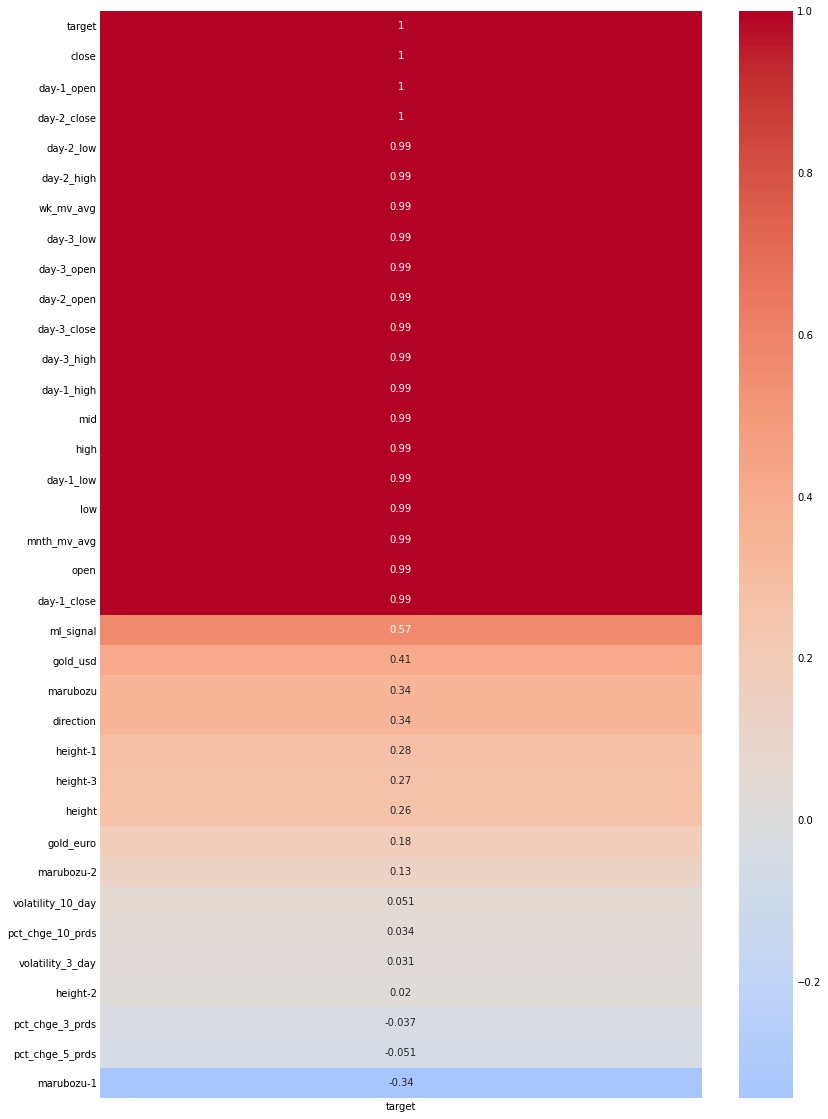

In [195]:
figure = plt.figure(figsize=(12,20))
sns.heatmap(corr_df.corr()[['target']].sort_values('target',ascending=False),annot=True, cmap='coolwarm', center=0);

A lot of the features are highly correlated - I will leave them in a let ridge and lasso penalties remove the unecessary featues. I will then go back and remove my own features. 

---

## 3.1 Train/Test Split

In [172]:
## Features and scaling

In [383]:
features.columns

Index(['open', 'high', 'low', 'close', 'mid', 'wk_mv_avg', 'mnth_mv_avg',
       'volatility_3_day', 'volatility_10_day', 'pct_chge_3_prds',
       'pct_chge_5_prds', 'pct_chge_10_prds', 'height', 'height-1', 'height-2',
       'height-3', 'direction', 'gold_usd', 'gold_euro', 'marubozu',
       'marubozu+1', 'marubozu-1', 'marubozu-2', 'day-1_open', 'day-2_open',
       'day-3_open', 'day-1_high', 'day-2_high', 'day-3_high', 'day-1_low',
       'day-2_low', 'day-3_low', 'day-1_close', 'day-2_close', 'day-3_close',
       'day+1_open', 'day+1_high', 'day+1_low', 'day+1_close', 'day+2_high',
       'day+2_low', 'day+3_high', 'day+3_low', 'day+4_high', 'day+4_low',
       'day+5_high', 'day+5_low', 'exit_price', 'select', 'target', 'date+5',
       'ml_signal'],
      dtype='object')

In [384]:
# features_df = features.drop(['marubozu+1','day+1_open', 'day+1_high', 'day+1_low', 'day+1_close', 'day+2_high',
#        'day+2_low', 'day+3_high', 'day+3_low', 'day+4_high', 'day+4_low',
#        'day+5_high', 'day+5_low', 'exit_price', 'select', 'date+5','target'], axis=1)
features_df = features.drop(['height-1', 'height-2',
       'height-3', 'marubozu',
       'marubozu+1', 'marubozu-1', 'marubozu-2', 'day-1_open', 'day-2_open',
       'day-3_open', 'day-1_high', 'day-2_high', 'day-3_high', 'day-1_low',
       'day-2_low', 'day-3_low', 'day-1_close', 'day-2_close', 'day-3_close',
       'day+1_open', 'day+1_high', 'day+1_low', 'day+1_close', 'day+2_high',
       'day+2_low', 'day+3_high', 'day+3_low', 'day+4_high', 'day+4_low',
       'day+5_high', 'day+5_low', 'exit_price', 'select', 'target', 'date+5'], axis=1)

In [385]:
X = features_df
y = features['target']

In [386]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=15)

#Standardize data
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

# 3.0 Model

In [387]:
#I instantiate the various models
lr = LinearRegression()

lasso = LassoCV(n_alphas=200)

ridge = RidgeCV(alphas=np.linspace(.1, 10, 100))

enet = ElasticNetCV(l1_ratio=np.linspace(0.001, 1, 50), n_alphas = 100)

In [388]:
lr_scores = cross_val_score(lr, X_train, y_train, cv=5)
lr_scores.mean()

0.99033514715239

In [389]:
lasso_scores = cross_val_score(lasso, X_train_ss, y_train, cv=5)
lasso_scores.mean()

0.9925780359431633

In [390]:
ridge_scores = cross_val_score(ridge, X_train_ss, y_train, cv=5)
ridge_scores.mean()

0.991933604672289

In [391]:
enet_scores = cross_val_score(enet, X_train_ss, y_train, cv=5)
enet_scores.mean()

0.9925727212106477

Enet was best

In [392]:
enet.fit(X_train_ss, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
             l1_ratio=array([0.001     , 0.02138776, 0.04177551, 0.06216327, 0.08255102,
       0.10293878, 0.12332653, 0.14371429, 0.16410204, 0.1844898 ,
       0.20487755, 0.22526531, 0.24565306, 0.26604082, 0.28642857,
       0.30681633, 0.32720408, 0.34759184, 0.36797959, 0.38836735,
       0.4087551 , 0.42914286, 0.44953061, 0.46991837, 0.4...
       0.61263265, 0.63302041, 0.65340816, 0.67379592, 0.69418367,
       0.71457143, 0.73495918, 0.75534694, 0.77573469, 0.79612245,
       0.8165102 , 0.83689796, 0.85728571, 0.87767347, 0.89806122,
       0.91844898, 0.93883673, 0.95922449, 0.97961224, 1.        ]),
             max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
             positive=False, precompute='auto', random_state=None,
             selection='cyclic', tol=0.0001, verbose=0)

In [393]:
enet.score(X_train_ss, y_train)

0.9964183911185999

In [394]:
enet.score(X_test_ss, y_test)

0.9957977531501083

In [395]:
yhat = enet.predict(X_test_ss)
r2_score(y_test, pred)

-1.4569896396646058

In [396]:
mse = (mean_squared_error(y_test, yhat))
print("The root mean squared error of the model is " + str(rmse))

The root mean squared error of the model is 0.011614778442593647


In [397]:
residuals = y_test - yhat

In [398]:
yhat

array([1.52159655, 1.35674001, 1.0985805 , 1.38275057, 1.41554471,
       1.15757219, 1.12537375, 1.05480592, 1.25851875, 1.19369671,
       1.13483076, 1.30902992, 1.2869046 , 1.47336943, 1.13230842,
       1.28545597])

Text(0.5, 0, 'Predictions')

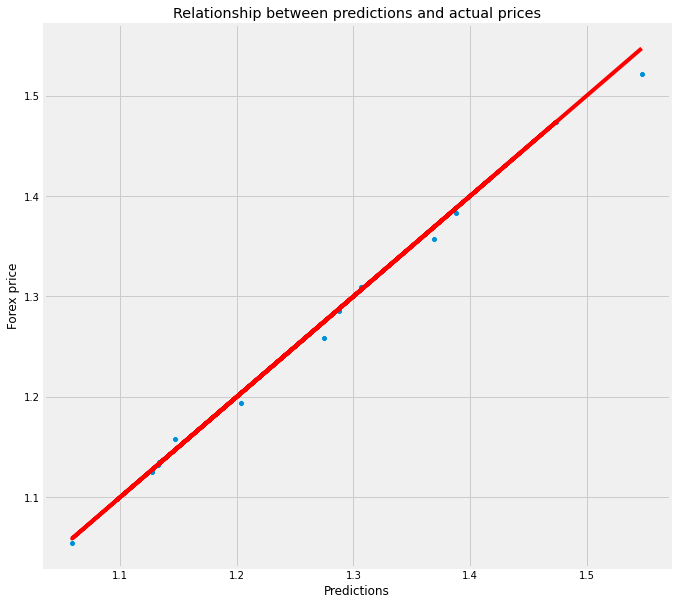

In [399]:
# Plot to show the correlation between prediction and value.
f, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(y_test, yhat);
ax.plot(y_test.min(), y_test.max(),
        y_test, y_test, color='r');
plt.title("Relationship between predictions and actual prices") 
plt.ylabel("Forex price")
plt.xlabel("Predictions") 

Text(0.5, 0, 'Predictions')

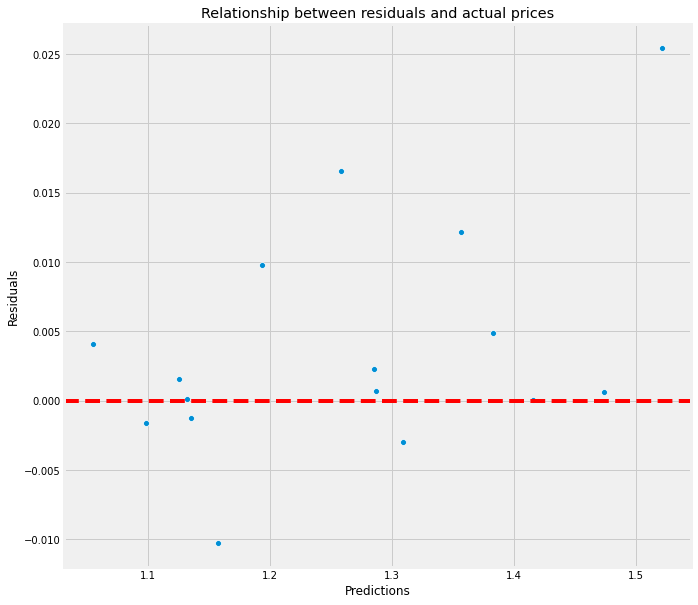

In [400]:
#plt.scatter(yhat, residuals);

f, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(yhat, residuals);
ax.axhline(0, ls='--', color='r')
plt.title("Relationship between residuals and actual prices") 
plt.ylabel("Residuals")
plt.xlabel("Predictions")

## 3.2 Fit Model

In [401]:
## Interpretation

In [402]:
model_coefs = pd.DataFrame(enet.coef_, index=X.columns)

model_coefs.rename(columns={0:'coef'}, inplace=True)
model_coefs.reset_index(inplace=True)
model_coefs.sort_values('coef',ascending=False, inplace=True)
model_coefs.rename(columns={'index':'feature'}, inplace=True)
model_coefs

,feature,coef
1,high,0.063919
3,close,0.051576
0,open,0.042659
13,direction,0.015438
2,low,0.006038
16,ml_signal,0.004486
5,wk_mv_avg,0.000475
6,mnth_mv_avg,0.000000
7,volatility_3_day,-0.000000
9,pct_chge_3_prds,-0.000000


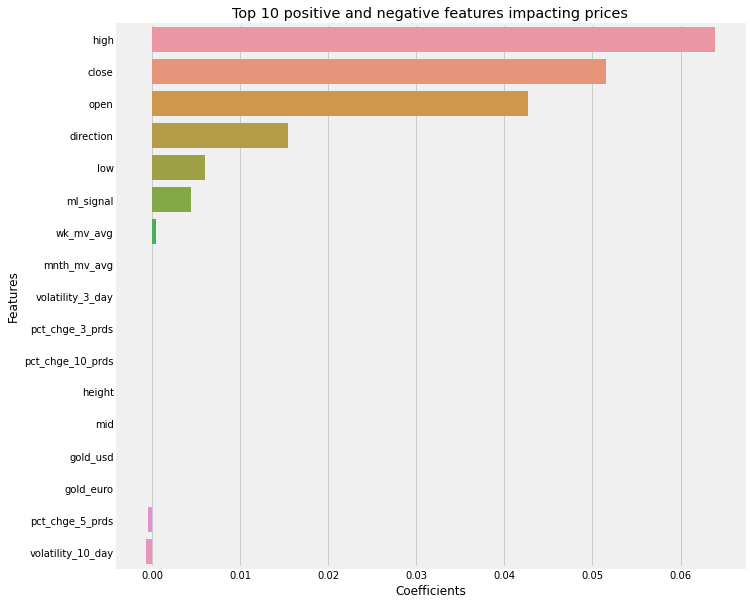

In [403]:
# Plot the graph to show top and bottom features.

f, ax = plt.subplots(figsize=(10,10))
sns.barplot(model_coefs['coef'],model_coefs['feature']);
plt.title("Top 10 positive and negative features impacting prices") 
plt.ylabel("Features")
plt.xlabel("Coefficients") ;

In [404]:
yhat

array([1.52159655, 1.35674001, 1.0985805 , 1.38275057, 1.41554471,
       1.15757219, 1.12537375, 1.05480592, 1.25851875, 1.19369671,
       1.13483076, 1.30902992, 1.2869046 , 1.47336943, 1.13230842,
       1.28545597])

In [405]:
X_test

,open,high,low,close,mid,wk_mv_avg,mnth_mv_avg,volatility_3_day,volatility_10_day,pct_chge_3_prds,pct_chge_5_prds,pct_chge_10_prds,height,direction,gold_usd,gold_euro,ml_signal
date,,,,,,,,,,,,,,,,,
2008-06-19,1.55700,1.55880,1.54680,1.55130,1.554150,1.549850,1.557593,0.001652,0.005661,0.004849,0.004524,0.003357,0.00570,-1.0,313.8,237.9,0.0
2011-09-26,1.34000,1.35660,1.33610,1.35280,1.346400,1.355130,1.389521,0.003595,0.005096,-0.012179,-0.012614,-0.012396,0.01280,1.0,555.3,484.0,0.0
2016-01-06,1.07492,1.08255,1.07185,1.08234,1.078630,1.083837,1.091323,0.003049,0.002369,-0.008129,-0.013341,-0.013639,0.00742,1.0,379.2,414.3,0.0
2009-06-30,1.41100,1.41520,1.40010,1.40340,1.407200,1.404160,1.401571,0.001208,0.003062,0.004820,0.007013,0.017278,0.00760,-1.0,324.7,271.8,0.0
2011-04-11,1.44590,1.44690,1.43770,1.43900,1.442450,1.434130,1.415217,0.002907,0.001750,0.009942,0.015381,0.025414,0.00690,-1.0,510.1,414.5,0.0
2015-02-05,1.13530,1.14987,1.13314,1.14704,1.141170,1.137278,1.151376,0.003959,0.007241,0.008083,0.010108,-0.005122,0.01174,1.0,437.5,449.5,0.0
2018-12-10,1.14282,1.14398,1.13500,1.13690,1.139860,1.137008,1.135899,0.001891,0.002309,0.005385,0.003054,0.005052,0.00592,-1.0,432.7,446.7,0.0
2017-01-18,1.06977,1.07045,1.06219,1.06406,1.066915,1.063794,1.053029,0.002022,0.002682,0.005002,0.008913,0.019581,0.00571,-1.0,422.1,463.5,0.0
2006-08-02,1.28300,1.28300,1.27430,1.27550,1.279250,1.275550,1.269112,0.001238,0.002571,0.004870,0.011225,0.018795,0.00750,-1.0,227.4,208.4,0.0


In [352]:
## Confusion Matrix

In [406]:
final_res_enet = X_test
final_res_enet['yhat'] = yhat
final_res_enet

,open,high,low,close,mid,wk_mv_avg,mnth_mv_avg,volatility_3_day,volatility_10_day,pct_chge_3_prds,pct_chge_5_prds,pct_chge_10_prds,height,direction,gold_usd,gold_euro,ml_signal,yhat
date,,,,,,,,,,,,,,,,,,
2008-06-19,1.55700,1.55880,1.54680,1.55130,1.554150,1.549850,1.557593,0.001652,0.005661,0.004849,0.004524,0.003357,0.00570,-1.0,313.8,237.9,0.0,1.521597
2011-09-26,1.34000,1.35660,1.33610,1.35280,1.346400,1.355130,1.389521,0.003595,0.005096,-0.012179,-0.012614,-0.012396,0.01280,1.0,555.3,484.0,0.0,1.356740
2016-01-06,1.07492,1.08255,1.07185,1.08234,1.078630,1.083837,1.091323,0.003049,0.002369,-0.008129,-0.013341,-0.013639,0.00742,1.0,379.2,414.3,0.0,1.098581
2009-06-30,1.41100,1.41520,1.40010,1.40340,1.407200,1.404160,1.401571,0.001208,0.003062,0.004820,0.007013,0.017278,0.00760,-1.0,324.7,271.8,0.0,1.382751
2011-04-11,1.44590,1.44690,1.43770,1.43900,1.442450,1.434130,1.415217,0.002907,0.001750,0.009942,0.015381,0.025414,0.00690,-1.0,510.1,414.5,0.0,1.415545
2015-02-05,1.13530,1.14987,1.13314,1.14704,1.141170,1.137278,1.151376,0.003959,0.007241,0.008083,0.010108,-0.005122,0.01174,1.0,437.5,449.5,0.0,1.157572
2018-12-10,1.14282,1.14398,1.13500,1.13690,1.139860,1.137008,1.135899,0.001891,0.002309,0.005385,0.003054,0.005052,0.00592,-1.0,432.7,446.7,0.0,1.125374
2017-01-18,1.06977,1.07045,1.06219,1.06406,1.066915,1.063794,1.053029,0.002022,0.002682,0.005002,0.008913,0.019581,0.00571,-1.0,422.1,463.5,0.0,1.054806
2006-08-02,1.28300,1.28300,1.27430,1.27550,1.279250,1.275550,1.269112,0.001238,0.002571,0.004870,0.011225,0.018795,0.00750,-1.0,227.4,208.4,0.0,1.258519


In [372]:
yhat

array([1.52159655, 1.35674001, 1.0985805 , 1.38275057, 1.41554471,
       1.15757219, 1.12537375, 1.05480592, 1.25851875, 1.19369671,
       1.13483076, 1.30902992, 1.2869046 , 1.47336943, 1.13230842,
       1.28545597])

In [407]:
final_res_enet.sort_index(inplace=True)
final_res_enet[['open','high','low','close','yhat']].head()

,open,high,low,close,yhat
date,,,,,
2006-03-31,1.2159,1.2164,1.2066,1.2072,1.193697
2006-08-02,1.2830,1.2830,1.2743,1.2755,1.258519
2007-12-12,1.4662,1.4749,1.4657,1.4728,1.473369
2008-06-19,1.5570,1.5588,1.5468,1.5513,1.521597
2009-06-30,1.4110,1.4152,1.4001,1.4034,1.382751


In [408]:
result_dates = final_res_enet.index

In [413]:
prepare_res = features.drop(['ml_signal','mid','wk_mv_avg', 'mnth_mv_avg',
       'volatility_3_day', 'volatility_10_day', 'pct_chge_3_prds',
       'pct_chge_5_prds', 'pct_chge_10_prds', 'height-1', 'height-2',
       'height-3', 'gold_usd', 'gold_euro', 'marubozu',
       'marubozu+1', 'marubozu-1', 'marubozu-2', 'day-1_open', 'day-2_open',
       'day-3_open', 'day-1_high', 'day-2_high', 'day-3_high', 'day-1_low',
       'day-2_low', 'day-3_low', 'day-1_close', 'day-2_close', 'day-3_close',
       'day+1_open', 'day+1_high', 'day+1_low', 'day+1_close', 'day+2_high',
       'day+2_low', 'day+3_high', 'day+3_low', 'day+4_high', 'day+4_low',
       'day+5_high', 'day+5_low', 'select', 'date+5'], axis=1)

In [429]:
create_cm_df = prepare_res.loc[prepare_res.index.isin(result_dates)]
create_cm_df;

In [430]:
create_cm_df['yhat'] = final_res_enet[['yhat']]
create_cm_df.rename(columns={'exit_price':'threshold','target':'actual_best'}, inplace=True)

# X_test['exit_price'] = 
#exit_price

In [431]:
def classify_row(row):
    
    if row['direction'] == -1:
        if row['actual_best'] <= row['threshold']:
            return 1
        else:
            return 0
    elif row['direction'] == 1:
        if row['actual_best'] >= row['threshold']:
            return 1
        else:
            return 0

In [432]:
def classify_mlr(row):
    
    if row['direction'] == -1:
        if row['yhat'] <= row['threshold']:
            return 1
        else:
            return 0
    elif row['direction'] == 1:
        if row['yhat'] >= row['threshold']:
            return 1
        else:
            return 0

In [433]:
create_cm_df['correct_decision'] = create_cm_df.apply(classify_row, axis=1)

In [434]:
create_cm_df['ml_decision'] = create_cm_df.apply(classify_mlr, axis=1)

In [435]:
create_cm_df

,open,high,low,close,height,direction,threshold,actual_best,yhat,correct_decision,ml_decision
date,,,,,,,,,,,
2006-03-31,1.21590,1.21640,1.20660,1.20720,0.00870,-1.0,1.19850,1.20350,1.193697,0,1
2006-08-02,1.28300,1.28300,1.27430,1.27550,0.00750,-1.0,1.26800,1.27510,1.258519,0,1
2007-12-12,1.46620,1.47490,1.46570,1.47280,0.00660,1.0,1.47940,1.47400,1.473369,0,0
2008-06-19,1.55700,1.55880,1.54680,1.55130,0.00570,-1.0,1.54560,1.54700,1.521597,0,1
2009-06-30,1.41100,1.41520,1.40010,1.40340,0.00760,-1.0,1.39580,1.38760,1.382751,1,1
2011-04-11,1.44590,1.44690,1.43770,1.43900,0.00690,-1.0,1.43210,1.41560,1.415545,1,1
2011-09-26,1.34000,1.35660,1.33610,1.35280,0.01280,1.0,1.36560,1.36890,1.356740,1,0
2012-01-09,1.26941,1.27846,1.26929,1.27799,0.00858,1.0,1.28657,1.28776,1.285456,1,0
2012-12-05,1.31155,1.31259,1.30447,1.30549,0.00606,-1.0,1.29943,1.28761,1.286905,1,1


In [436]:
def clasify_cm(row):
    if row['correct_decision'] == 1 and row['ml_decision'] ==1:
        return 'tp'
    elif row['correct_decision'] == 0 and row['ml_decision'] == 0:
        return 'tn'
    elif row['correct_decision'] == 0 and row['ml_decision'] == 1:
        return 'fp'
    elif row['correct_decision'] == 1 and row['ml_decision'] == 0:
        return 'fn'

In [439]:
create_cm_df['outcome'] = create_cm_df.apply(clasify_cm, axis=1)
create_cm_df

,open,high,low,close,height,direction,threshold,actual_best,yhat,correct_decision,ml_decision,outcome
date,,,,,,,,,,,,
2006-03-31,1.21590,1.21640,1.20660,1.20720,0.00870,-1.0,1.19850,1.20350,1.193697,0,1,fp
2006-08-02,1.28300,1.28300,1.27430,1.27550,0.00750,-1.0,1.26800,1.27510,1.258519,0,1,fp
2007-12-12,1.46620,1.47490,1.46570,1.47280,0.00660,1.0,1.47940,1.47400,1.473369,0,0,tn
2008-06-19,1.55700,1.55880,1.54680,1.55130,0.00570,-1.0,1.54560,1.54700,1.521597,0,1,fp
2009-06-30,1.41100,1.41520,1.40010,1.40340,0.00760,-1.0,1.39580,1.38760,1.382751,1,1,tp
2011-04-11,1.44590,1.44690,1.43770,1.43900,0.00690,-1.0,1.43210,1.41560,1.415545,1,1,tp
2011-09-26,1.34000,1.35660,1.33610,1.35280,0.01280,1.0,1.36560,1.36890,1.356740,1,0,fn
2012-01-09,1.26941,1.27846,1.26929,1.27799,0.00858,1.0,1.28657,1.28776,1.285456,1,0,fn
2012-12-05,1.31155,1.31259,1.30447,1.30549,0.00606,-1.0,1.29943,1.28761,1.286905,1,1,tp


In [454]:
def create_cm(enet_res):
    
    res_cm = [[0,0],
              [0,0]]
    
    for res in enet_res:
        if res == 'tp':
            res_cm[0][0] += 1
        elif res == 'fp':
            res_cm[0][1] += 1
        elif res == 'fn':
            res_cm[1][0] += 1
        elif res == 'tn':
            res_cm[1][1] += 1
    
    return res_cm

In [460]:
cm = create_cm(create_cm_df['outcome'])

In [461]:
cm_df = pd.DataFrame(cm, index=['pred_success', 'pred_non_success'], columns=['actual success', 'actual non_success'])
cm_df

,actual success,actual non_success
pred_success,8,4
pred_non_success,2,2


In [458]:
def print_metrics(cm):
    # Accuracy - how many did the model get right
    # Total number of correct predictions / total number of predictions
    acc= (cm[0][0]+cm[1][1])/(np.sum(cm))
    
    # Precision proportion of positive identifications that were actually correct
    # True positives/ true positives + false positives)
    prec = cm[0][0]/(cm[0][0]+cm[0][1])
    
    # Recall - proportion of actual positives that were correctly defined
    # True positives/ true positives + false negatives
    rec = cm[0][0]/(cm[0][0]+cm[1][0])

    print(f"Accuracy:\t{round(acc,2)}\nPrecision:\t{round(prec,2)}\nRecall:\t\t{round(rec,2)}")


In [459]:
# Display the results
print_metrics(cm)

Accuracy:	0.62
Precision:	0.67
Recall:		0.8
